In [3]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **CONFIG BLOCK**

In [4]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Early Stopping: patience=5)**

In [5]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763362801.152541      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763362807.612958     128 service.cc:148] XLA service 0x7dcbac003da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763362807.613836     128 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763362808.334346     128 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763362828.885954     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.3806 - loss: 1.0625

77/77 ━━━━━━━━━━━━━━━━━━━━ 69s 555ms/step - accuracy: 0.3819 - loss: 1.0610 - val_accuracy: 0.7422 - val_loss: 0.6692
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7773 - loss: 0.5805

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 366ms/step - accuracy: 0.7776 - loss: 0.5798 - val_accuracy: 0.8389 - val_loss: 0.4225
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8259 - loss: 0.4616

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 350ms/step - accuracy: 0.8260 - loss: 0.4615 - val_accuracy: 0.8418 - val_loss: 0.3982
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8427 - loss: 0.4002

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.8428 - loss: 0.4001 - val_accuracy: 0.8746 - val_loss: 0.3186
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8527 - loss: 0.3674

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.8527 - loss: 0.3674 - val_accuracy: 0.8832 - val_loss: 0.3046
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.8219 - loss: 0.4574 - val_accuracy: 0.8613 - val_loss: 0.3397
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8489 - loss: 0.3752

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 362ms/step - accuracy: 0.8491 - loss: 0.3748 - val_accuracy: 0.8895 - val_loss: 0.2863
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8821 - loss: 0.2925

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 352ms/step - accuracy: 0.8821 - loss: 0.2926 - val_accuracy: 0.9022 - val_loss: 0.2465
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.8903 - loss: 0.2786 - val_accuracy: 0.9005 - val_loss: 0.2608
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9101 - loss: 0.2324

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.9100 - loss: 0.2325 - val_accuracy: 0.9166 - val_loss: 0.2066
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9121 - loss: 0.2385

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.9121 - loss: 0.2383 - val_accuracy: 0.9356 - val_loss: 0.1796
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.9208 - loss: 0.2154 - val_accuracy: 0.9264 - val_loss: 0.1940
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9169 - loss: 0.1998

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 363ms/step - accuracy: 0.9169 - loss: 0.1998 - val_accuracy: 0.9373 - val_loss: 0.1595
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9413 - loss: 0.1568 - val_accuracy: 0.9356 - val_loss: 0.1784
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.9212 - loss: 0.1805 - val_accuracy: 0.7934 - val_loss: 0.4342
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.8425 - loss: 0.3747 - val_accuracy: 0.9154 - val_loss: 0.2199
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9310 - loss: 0.2007

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.9309 - loss: 0.2008 - val_accuracy: 0.9476 - val_loss: 0.1474
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9401 - loss: 0.1509

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.9401 - loss: 0.1510 - val_accuracy: 0.9591 - val_loss: 0.1183
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9347 - loss: 0.1443

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 363ms/step - accuracy: 0.9349 - loss: 0.1442 - val_accuracy: 0.9661 - val_loss: 0.0891
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9672 - loss: 0.0936

77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 362ms/step - accuracy: 0.9671 - loss: 0.0937 - val_accuracy: 0.9747 - val_loss: 0.0729


# **EVALUATION AND METRICS**

55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.8752 - loss: 0.3171

 Test Accuracy: 92.69%
 Test Loss: 0.2062
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9291    0.8630    0.8948       562
         Normal     0.8865    0.9376    0.9114       625
Viral Pneumonia     0.9729    0.9800    0.9764       550

       accuracy                         0.9269      1737
      macro avg     0.9295    0.9269    0.9275      1737
   weighted avg     0.9277    0.9269    0.9266      1737



<Figure size 800x600 with 0 Axes>

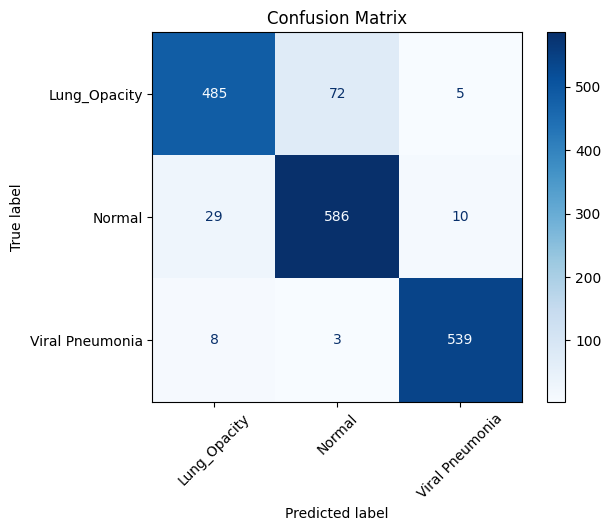

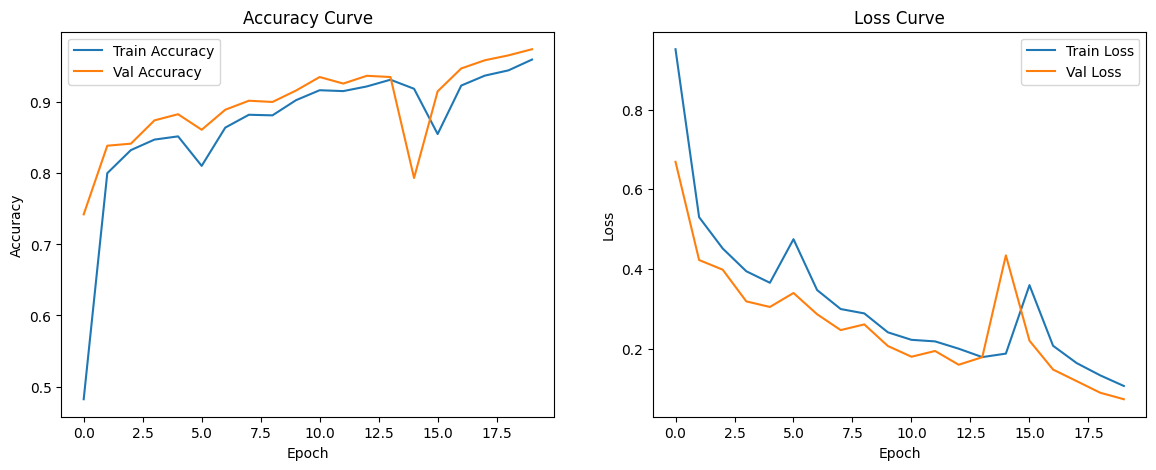

In [6]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **CONFIG BLOCK**

In [11]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Early Stopping: patience=2)**

In [12]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.
Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.3465 - loss: 1.0775

77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 420ms/step - accuracy: 0.3478 - loss: 1.0764 - val_accuracy: 0.7428 - val_loss: 0.6240
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7471 - loss: 0.6131

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 351ms/step - accuracy: 0.7475 - loss: 0.6125 - val_accuracy: 0.8107 - val_loss: 0.4764
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8014 - loss: 0.4847

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - accuracy: 0.8016 - loss: 0.4844 - val_accuracy: 0.8516 - val_loss: 0.3628
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.8476 - loss: 0.3833 - val_accuracy: 0.8377 - val_loss: 0.4114
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8561 - loss: 0.3742

77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 357ms/step - accuracy: 0.8561 - loss: 0.3740 - val_accuracy: 0.8809 - val_loss: 0.2868
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.8889 - loss: 0.2821 - val_accuracy: 0.8809 - val_loss: 0.2924
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.8730 - loss: 0.3354 - val_accuracy: 0.8314 - val_loss: 0.4204


# **EVALUATION AND METRICS**

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8647 - loss: 0.3297

 Test Accuracy: 89.18%
 Test Loss: 0.2856
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.8534    0.8594    0.8564       562
         Normal     0.8856    0.8544    0.8697       625
Viral Pneumonia     0.9366    0.9673    0.9517       550

       accuracy                         0.8918      1737
      macro avg     0.8918    0.8937    0.8926      1737
   weighted avg     0.8913    0.8918    0.8914      1737



<Figure size 800x600 with 0 Axes>

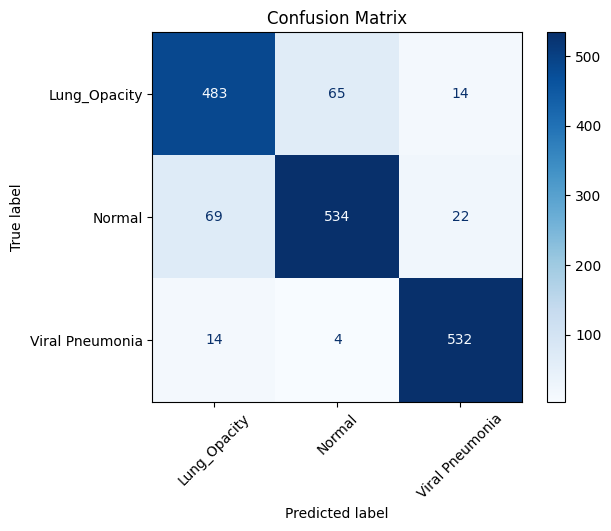

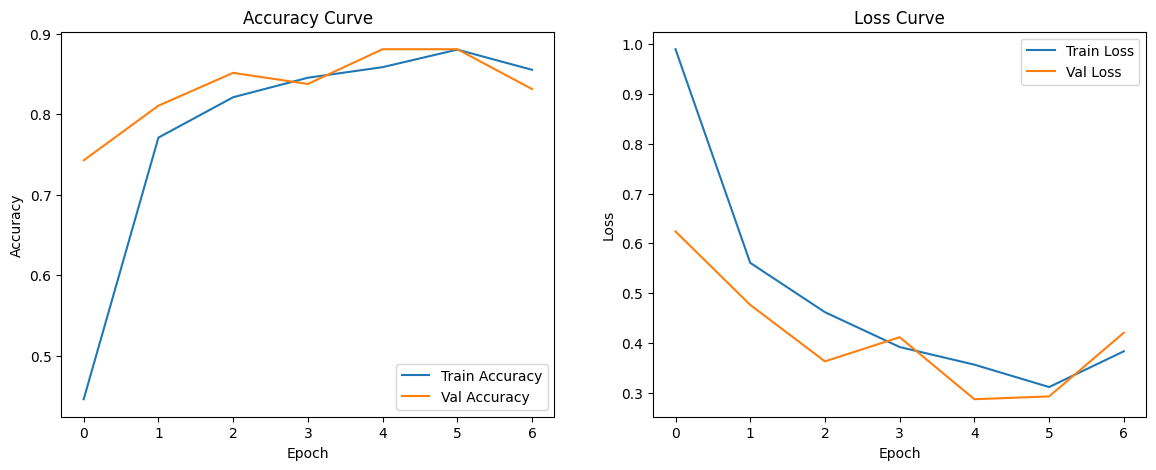

In [13]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
